# Crude_OIL_Price_Prediction from 10/30/2012 to10/28/2022

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Crude_oil.csv')

In [3]:
data.head()

,Date,Close,Volume,Open,High,Low
0,10/28/2022,87.90,241417.0,88.67,88.76,87.08
1,10/27/2022,88.26,273717.0,88.26,89.79,87.33
2,10/26/2022,87.91,271474.0,85.07,88.41,84.14
3,10/25/2022,85.32,226337.0,84.88,86.03,83.06
4,10/24/2022,84.58,238458.0,85.24,85.92,82.63


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2548 non-null   object 
 1   Close   2548 non-null   float64
 2   Volume  2517 non-null   float64
 3   Open    2548 non-null   float64
 4   High    2548 non-null   float64
 5   Low     2548 non-null   float64
dtypes: float64(5), object(1)
memory usage: 119.6+ KB


In [5]:
data.describe()

,Close,Volume,Open,High,Low
count,2548.000000,2.517000e+03,2548.000000,2548.000000,2548.000000
mean,66.043740,3.954717e+05,66.042500,66.959839,65.065043
std,22.732093,2.345385e+05,22.710749,22.820487,22.565127
min,-37.630000,1.530000e+02,-37.250000,-35.200000,-40.320000
25%,48.620000,2.244770e+05,48.665000,49.317500,47.800000
50%,59.720000,3.638160e+05,59.770000,60.545000,58.850000
75%,87.467500,5.581500e+05,87.450000,88.695000,86.342500
max,123.700000,1.693652e+06,124.580000,129.440000,120.790000


In [6]:
data['Volume'].unique

<bound method Series.unique of 0       241417.0
1       273717.0
2       271474.0
3       226337.0
4       238458.0
          ...   
2543    185846.0
2544    273619.0
2545    185097.0
2546    192354.0
2547         NaN
Name: Volume, Length: 2548, dtype: float64>

In [7]:
data[['Open', 'Close']]

,Open,Close
0,88.67,87.90
1,88.26,88.26
2,85.07,87.91
3,84.88,85.32
4,85.24,84.58
...,...,...
2543,84.65,85.65
2544,86.91,84.86
2545,86.10,87.09
2546,85.73,86.24


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

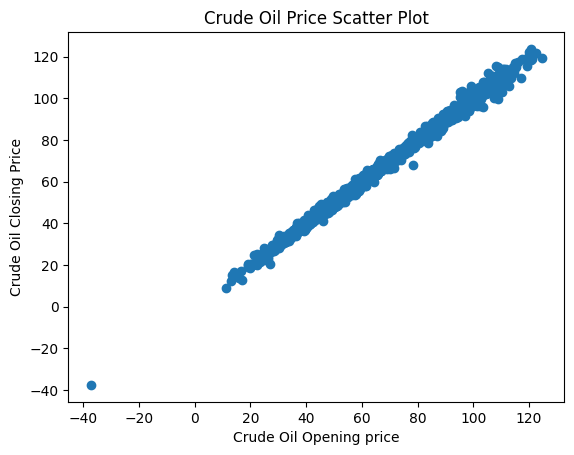

In [10]:
plt.scatter(data['Open'], data['Close'])
plt.xlabel('Crude Oil Opening price')
plt.ylabel('Crude Oil Closing Price')
plt.title('Crude Oil Price Scatter Plot')
plt.show()

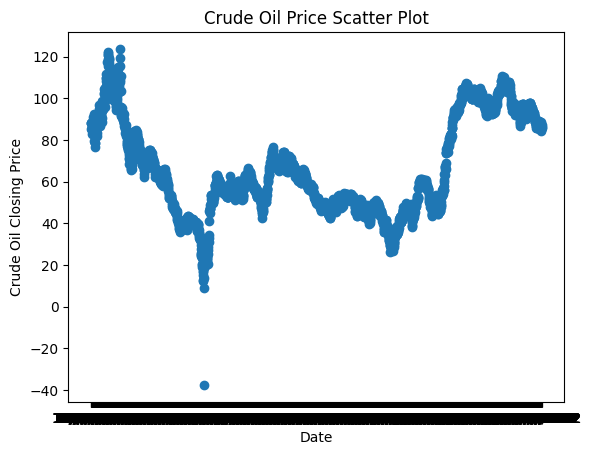

In [11]:
plt.scatter(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Crude Oil Closing Price')
plt.title('Crude Oil Price Scatter Plot')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
X = np.array(range(len(data))).reshape(-1, 1) 
y = data['Close'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
X_train.size

2038

In [15]:
y_train.size

2038

In [16]:
 X_test.size

510

In [17]:
 y_test.size

510

In [27]:
model =LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)

In [29]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 463.41444019020713
R-squared: 0.060195067499318244


In [30]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [31]:

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print('Train Mean Squared Error:', mse_train)
print('Train R-squared:', r2_train)
print('Test Mean Squared Error:', mse_test)
print('Test R-squared:', r2_test)

Train Mean Squared Error: 499.7213905980377
Train R-squared: 0.043433633573734864
Test Mean Squared Error: 463.41444019020713
Test R-squared: 0.060195067499318244


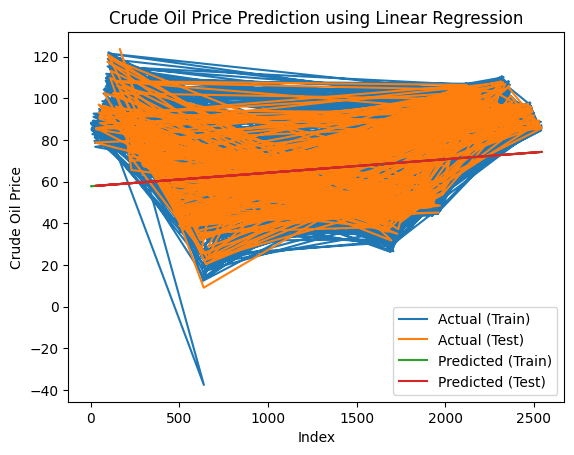

In [32]:
plt.plot(X_train, y_train, label='Actual (Train)')
plt.plot(X_test, y_test, label='Actual (Test)')
plt.plot(X_train, y_train_pred, label='Predicted (Train)')
plt.plot(X_test, y_test_pred, label='Predicted (Test)')
plt.xlabel('Index')
plt.ylabel('Crude Oil Price')
plt.title('Crude Oil Price Prediction using Linear Regression')
plt.legend()
plt.show()